**Syed Ishmum**

**July 31st, 2023**

**BrainStation**

**Data Science, cohort of May 15th - Aug 4th, 2023**

[sydishmum@gmail.com]

[https://www.linkedin.com/in/syed-ishmum/]

[https://github.com/sai-gh]

## Popularity Prediction Model using Spotify Dataset

### Summary:

Welcome to this Jupyter Notebook project for building a popularity prediction model using the Spotify dataset. Our goal is to develop a powerful machine learning model that accurately predicts song popularity by analyzing various features of songs available on Spotify.

This model holds immense potential for new and upcoming artists as well as record labels. It can provide valuable insights and feedback on the potential success of songs, guiding artists in making informed decisions about music production and marketing strategies. For record labels, it becomes a game-changer in identifying promising talent and allocating resources more efficiently.

To make our model even more robust, we plan to integrate user data in the future. By leveraging real-time information, such as streaming counts and user feedback, we can overcome cold-start challenges and adapt to emerging music trends. Our commitment also lies in addressing ethical concerns, ensuring user privacy, and building trust with our users.

With a focus on accuracy and sensitivity to industry needs, we aim to revolutionize the music industry through data-driven insights. Let's embark on this exciting journey and unleash the potential of music data analytics!

---
<h1>Table of Contents</h1>

<h3>1. Introduction:</h3>
<ol>
    <li><a href="#dc">Data Dictionary</a></li>
    <li><a href="#ion">Introduction, Objective and Navigation</a></li>
</ol>

<h3>2. Explorotory Data Analysis:</h3>
<ol>
    <li><a href="#eda">EDA</a></li>
    <li><a href="#dc2">Data Cleaning</a></li>
    <li><a href="#ncd">Numerical Column Distribution</a></li>
    <li><a href="#dmcv">Data mapling and Correlation visualization</a></li>
    <li><a href="#cm">Correlation Matrix</a></li>
</ol>

<h3>3. Next Steps:</h3>
<ol>
    <li><a href="#nxt">Next Steps</a></li>
</ol>

---
<a id="dc"></a>


## Data Dictionary

| Column Name       | Description                                                                                                                                                     | Data Type    |
|-------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------|--------------|
| track_id          | The Spotify ID for the track.                                                                                                                                   | object       |
| artists           | The artists' names who performed the track. If there is more than one artist, they are separated by a ';'                                                       | object       |
| album_name        | The album name in which the track appears.                                                                                                                      | object       |
| track_name        | Name of the track.                                                                                                                                             | object       |
| popularity        | The popularity of a track, represented as an integer between 0 and 100.                                                                                         | int64        |
| duration_ms       | The track length in milliseconds.                                                                                                                               | int64        |
| explicit          | Whether or not the track has explicit lyrics.                                                                                                                   | bool         |
| danceability      | Describes how suitable a track is for dancing, ranging from 0.0 (least danceable) to 1.0 (most danceable).                                                       | float64      |
| energy            | Represents a perceptual measure of intensity and activity, ranging from 0.0 to 1.0.                                                                             | float64      |
| key               | The key the track is in, mapped to pitches using standard Pitch Class notation.                                                                                | int64        |
| loudness          | The overall loudness of a track in decibels (dB).                                                                                                               | float64      |
| mode              | Indicates the modality (major or minor) of a track, represented as 1 (Major) or 0 (Minor).                                                                      | int64        |
| speechiness       | Detects the presence of spoken words in a track, ranging from 0.0 to 1.0.                                                                                        | float64      |
| acousticness      | A confidence measure of whether the track is acoustic, ranging from 0.0 to 1.0.                                                                                 | float64      |
| instrumentalness  | Predicts whether a track contains no vocals, ranging from 0.0 to 1.0.                                                                                            | float64      |
| liveness          | Detects the presence of an audience in the recording, ranging from 0.0 to 1.0.                                                                                   | float64      |
| valence           | A measure of the musical positiveness conveyed by a track, ranging from 0.0 to 1.0.                                                                             | float64      |
| tempo             | The overall estimated tempo of a track in beats per minute (BPM).                                                                                                | float64      |
| time_signature    | An estimated time signature, indicating the number of beats in each bar (or measure).                                                                           | int64        |
| track_genre       | The genre in which the track belongs.                                                                                                                           | object       |

---


<a id="ion"></a>
**Introduction:**

Welcome to the Song Popularity Prediction Model project! Our goal is to build a prediction model that accurately predicts the popularity of songs based on various features. The dataset we'll be working with is obtained from Spotify and contains valuable information about artists, album names, danceability, energy, and more.

**Objective:**

The primary objective of this project is to develop a machine learning model that can predict the popularity of songs. Popularity plays a significant role in the music industry, reflecting the overall appeal and acceptance of a song among listeners.

**Navigation:**

This Jupyter Notebook is organized into different sections, each focusing on specific aspects of the popularity prediction model. Use the provided Table of Contents to navigate seamlessly through the notebook. Each section contains explanations, code snippets, and visualizations to guide you through the process of building the song popularity prediction model.


### Libraries

In [16]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

<a id="eda"></a>
### EDA

As for EDA, we will start by checking for Null Values and any Duplicated rows. After that, we will look at the distribution of numerical columns and examine some correlations between our target variable and the columns!

In [17]:
# We will define out dataset as "data"
data = pd.read_csv('dataset.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [18]:
data.head(10)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
5,5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,False,0.688,0.4810,...,-8.807,1,0.1050,0.2890,0.000000,0.1890,0.6660,98.017,4,acoustic
6,6,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,False,0.407,0.1470,...,-8.822,1,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,3,acoustic
7,7,1EzrEOXmMH3G43AXT1y7pA,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,80,242946,False,0.703,0.4440,...,-9.331,1,0.0417,0.5590,0.000000,0.0973,0.7120,150.960,4,acoustic
8,8,0IktbUcnAGrvD03AWnz3Q8,Jason Mraz;Colbie Caillat,We Sing. We Dance. We Steal Things.,Lucky,74,189613,False,0.625,0.4140,...,-8.700,1,0.0369,0.2940,0.000000,0.1510,0.6690,130.088,4,acoustic
9,9,7k9GuJYLp2AzqokyEdwEw2,Ross Copperman,Hunger,Hunger,56,205594,False,0.442,0.6320,...,-6.770,1,0.0295,0.4260,0.004190,0.0735,0.1960,78.899,4,acoustic


We have around __114k rows and 20 columns__ and a good amount of them are already numerical!

<a id="dc2"></a>
### Data Cleaning

In [19]:
#lets see if we have any null values in our dataset
data.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

So there is only one entry with null values. So that is pretty much 1/114000 is = 8.771929824561404e-6 = __0.00008771929824561404% of the data is null__. I tried to scrape the missinng row from the internet based on the information I have, unfortunately I was not able to find anything. Thus we will be __dropping the row completly__ as we saw, it is a really insignificant amout of data compared to our entire dataset.

In [20]:
# Dropping the null value row
data = data.dropna()

In [21]:
# We are dropping this column becasue it is not just an indext column for the dataset
data = data.drop(['Unnamed: 0'], axis=1)

In [22]:
# Using the descrbe methode to look at the statistical values of your data!
data.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,113999.000000,1.139990e+05,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000
mean,33.238827,2.280312e+05,0.566801,0.641383,5.309126,-8.258950,0.637558,0.084652,0.314907,0.156051,0.213554,0.474066,122.147695,3.904034
std,22.304959,1.072961e+05,0.173543,0.251530,3.559999,5.029357,0.480708,0.105733,0.332522,0.309556,0.190378,0.259261,29.978290,0.432623
min,0.000000,8.586000e+03,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218500,4.000000
50%,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.597500,0.049000,0.273000,0.683000,140.071000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


Here's a more concise summary of the key observations from the output of `data.describe()`:

- Popularity varies with an average of __around 33.24__ and a __standard deviation of approximately 22.30.__
- The duration of songs ranges from approximately __8.6 seconds to 5,237 seconds__ (mean ~ 228,031 milliseconds).
- Danceability, energy, and loudness show __moderate variation__ (mean and std).
- The tempo of songs varies from around __0 BPM to 243 BPM.__

This summary provides a quick overview of the central tendencies and ranges of key numerical features in the dataset. It helps in understanding the general characteristics of the songs available in the Spotify dataset.

<a id="ncd"></a>
### Numerical Column Distributions

Here we will be looking at some visualizations of numarical columns/features! This will help us understand how to go forward with our data and manage it.

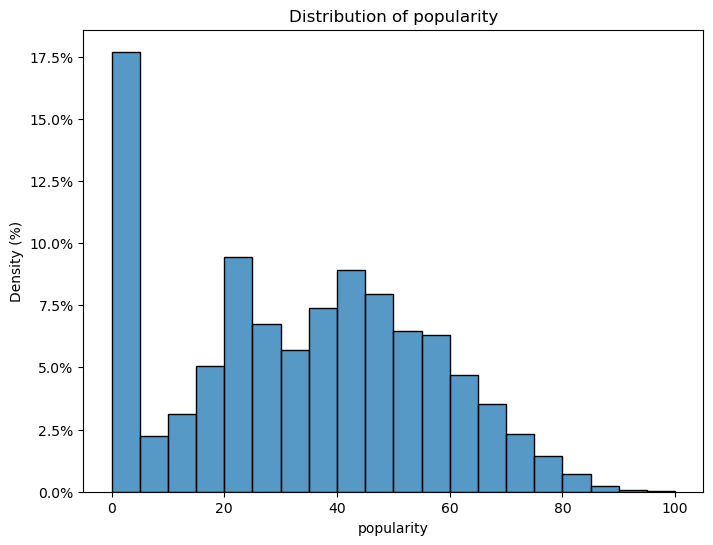

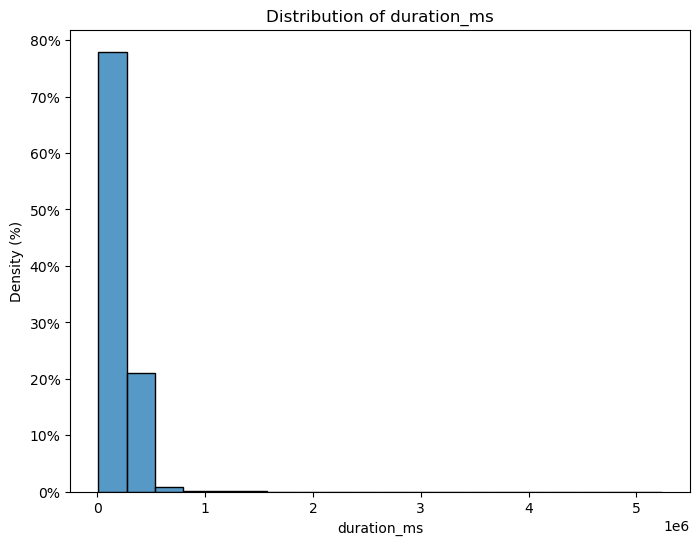

C:\Users\Syed Ishmum\anaconda3\envs\capstone\lib\site-packages\seaborn\_stats\counting.py:137: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  bin_edges = np.histogram_bin_edges(vals, bins, binrange, weight)
C:\Users\Syed Ishmum\anaconda3\envs\capstone\lib\site-packages\seaborn\_stats\counting.py:176: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, edges = np.histogram(vals, **bin_kws, weights=weights, density=density)


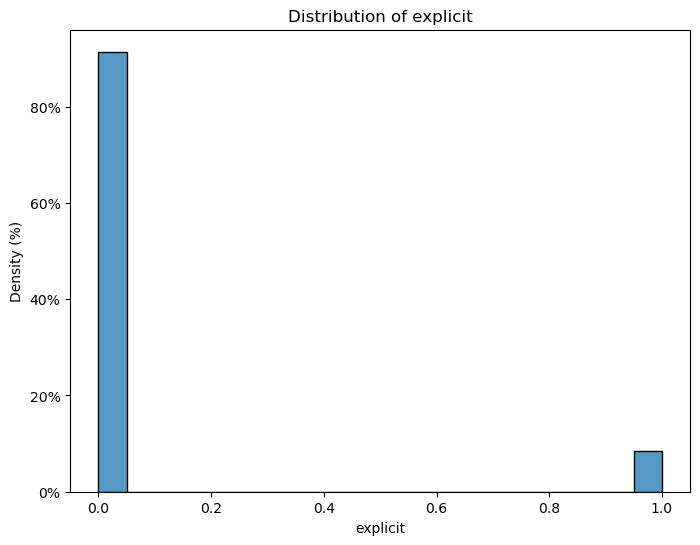

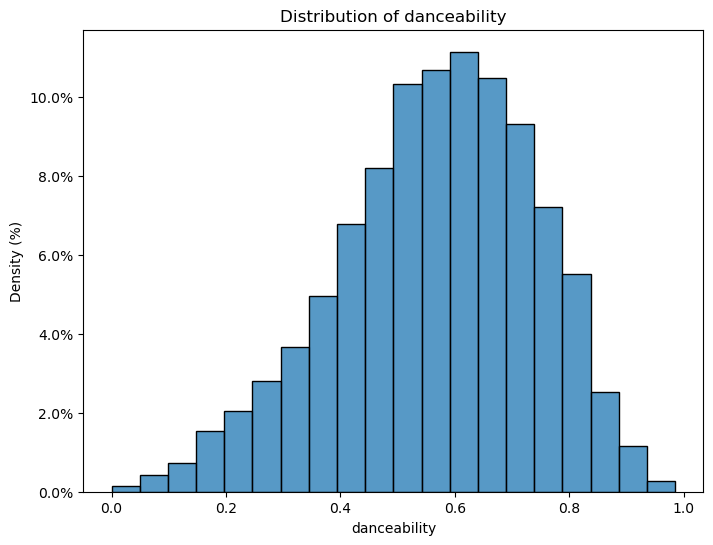

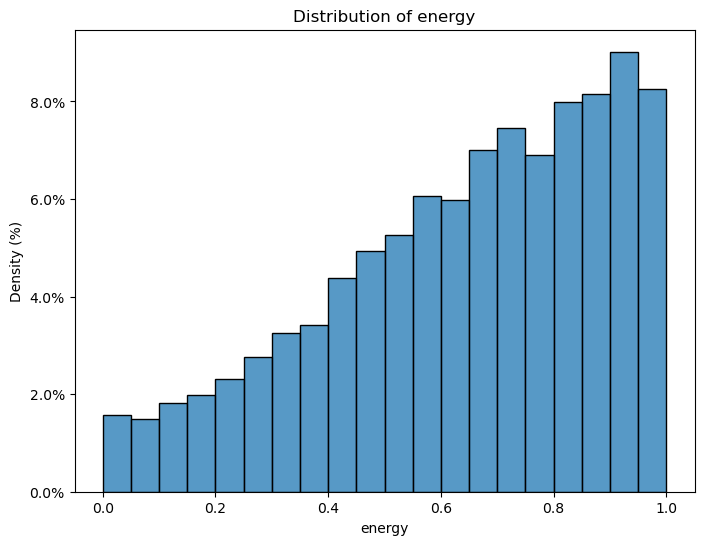

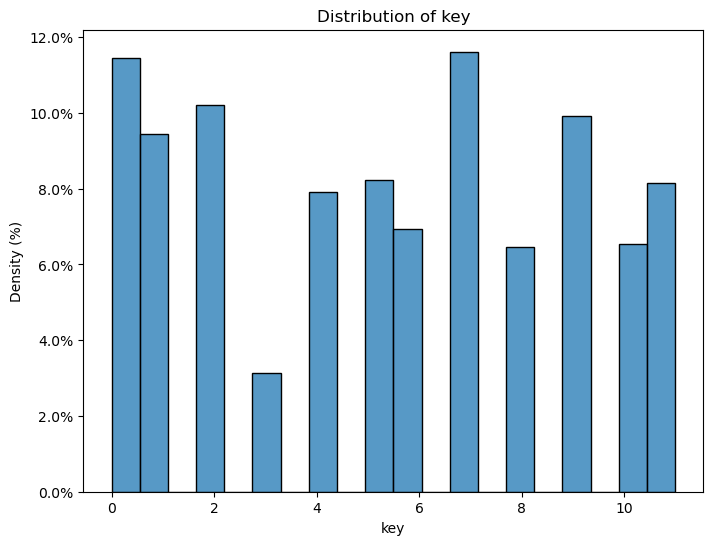

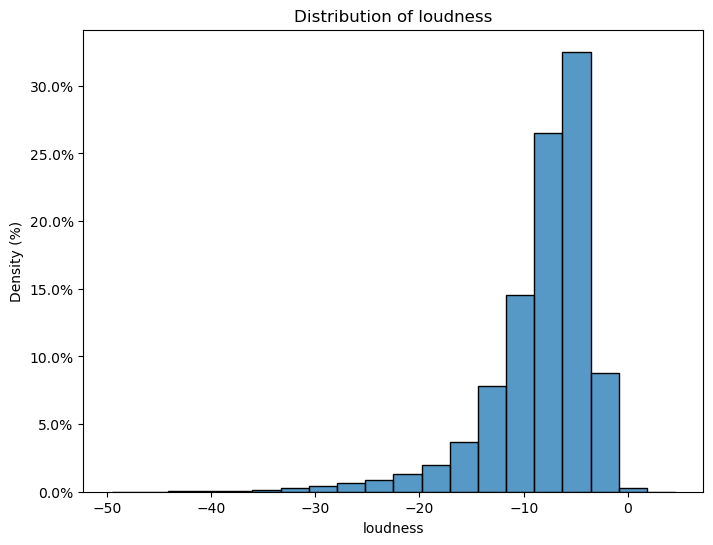

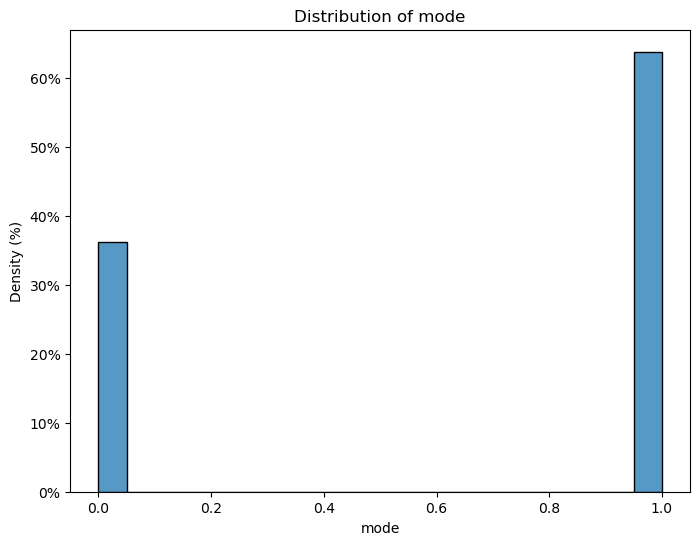

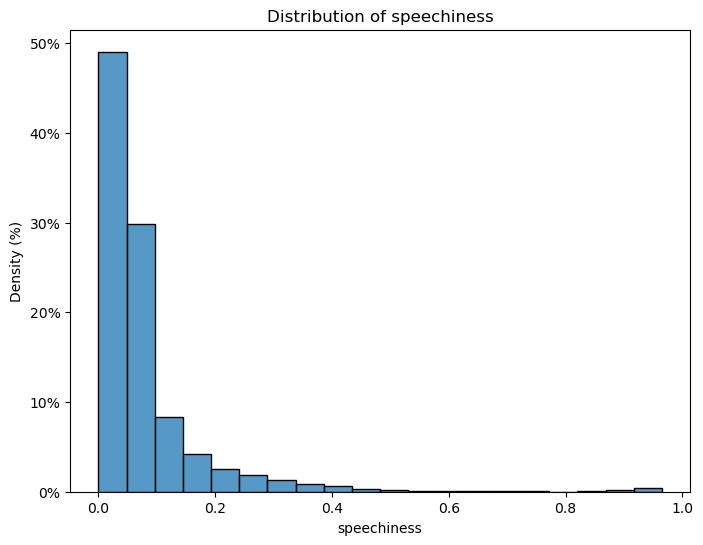

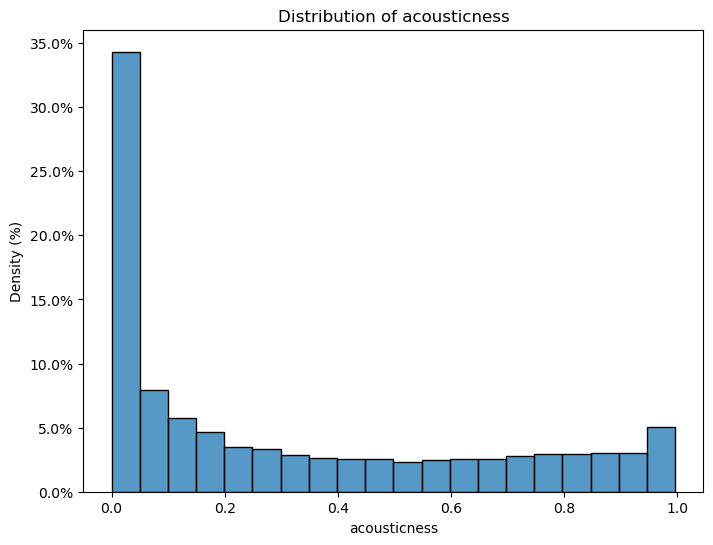

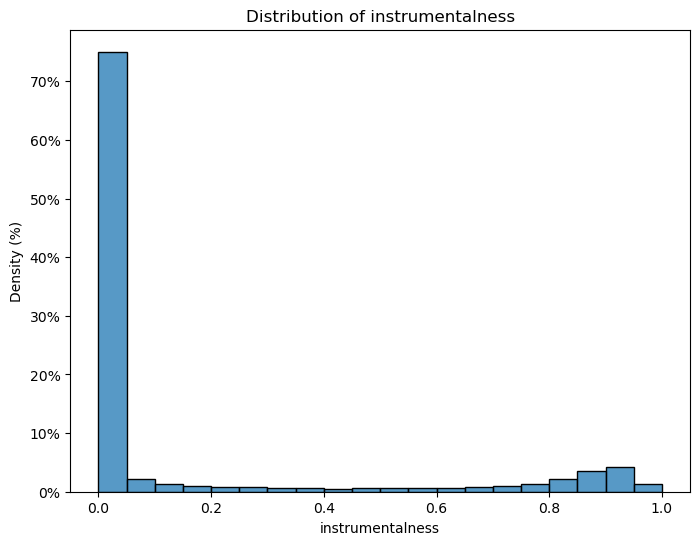

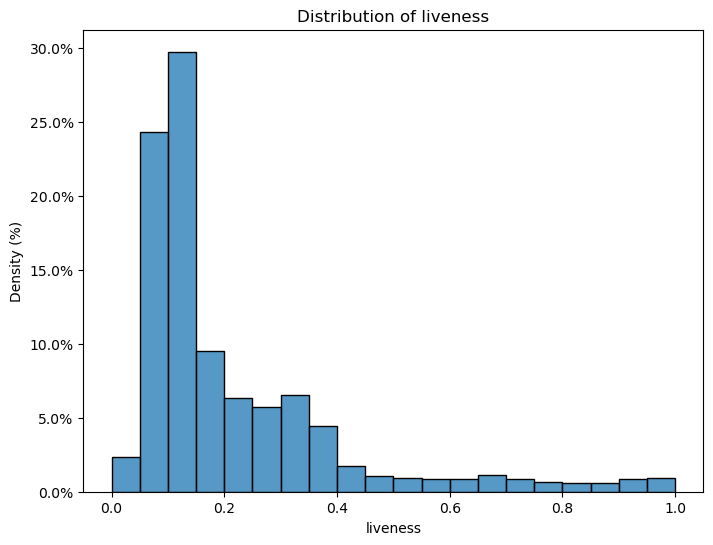

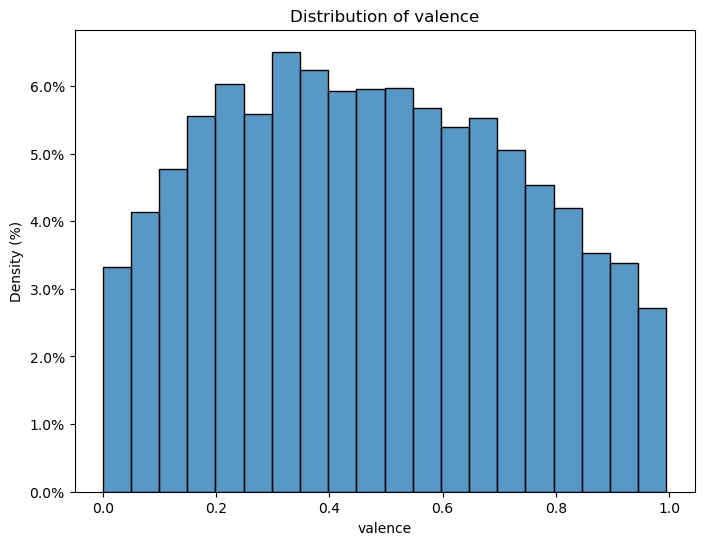

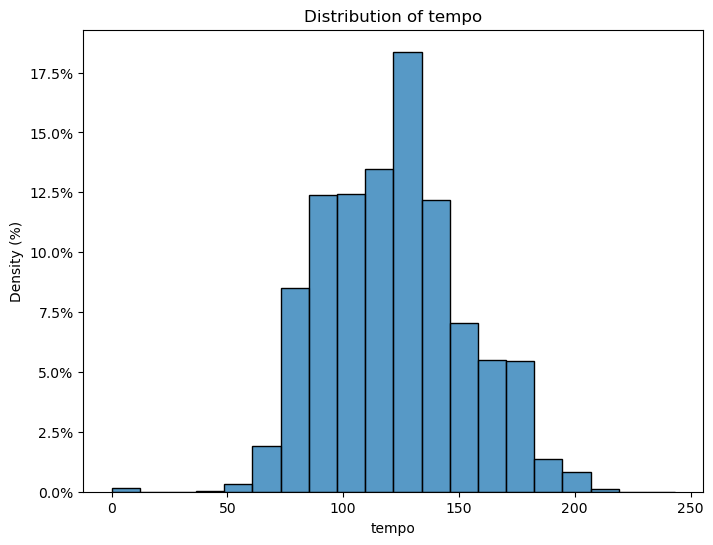

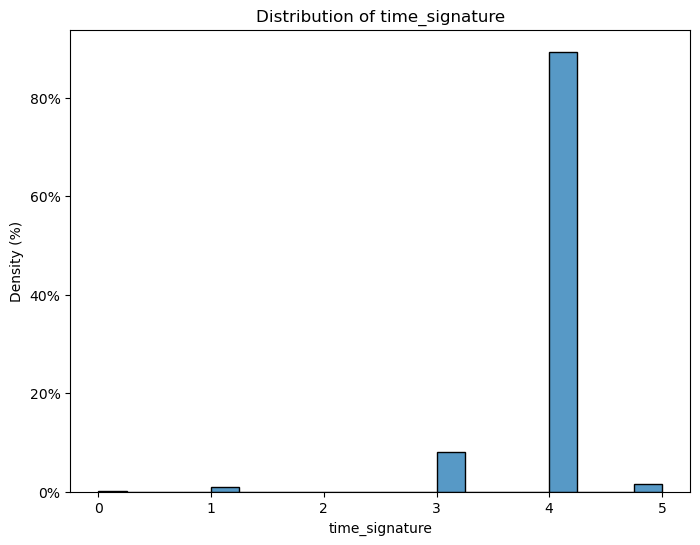

In [23]:
# Getting the numerical column names of the DataFrame
numerical_columns = data.columns.drop(['track_id','artists','album_name','track_name','track_genre'])

# Iterate over each column
for column in numerical_columns:
    
    plt.figure(figsize=(8, 6))
    
    # Plotting the distribution using Histogram plots with density scaled to percentage
    sns.histplot(data[column], stat='probability', bins=20)
   
    # Formatting y-axis ticks as percentages
    plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
   
    # Adding labels and title
    plt.xlabel(column)
    plt.ylabel('Density (%)')
    plt.title(f'Distribution of {column}')
    
    # Displaying the plot
    plt.show()

Here after looking at the distribution of the numerical columns we can infer on couple of important insights:

- __Popularity__ has a left scewed distribution, showing there are more songs that are lower on the end of the spectrum.
- __Valence__ has the most normal destribution out of all the numerical columns
- Majority of the songs in the data set have a __tempo between 80 to 170 BPM__
- __energy__ has a positive increasing right scewed distribution
- Most songs have __loudness of -9dB to -4dB__
- __danceability__ has a reletivly normal distribution, slightly right scewed

<a id="dmcv"></a>
### Data mapling and Correlation visualization

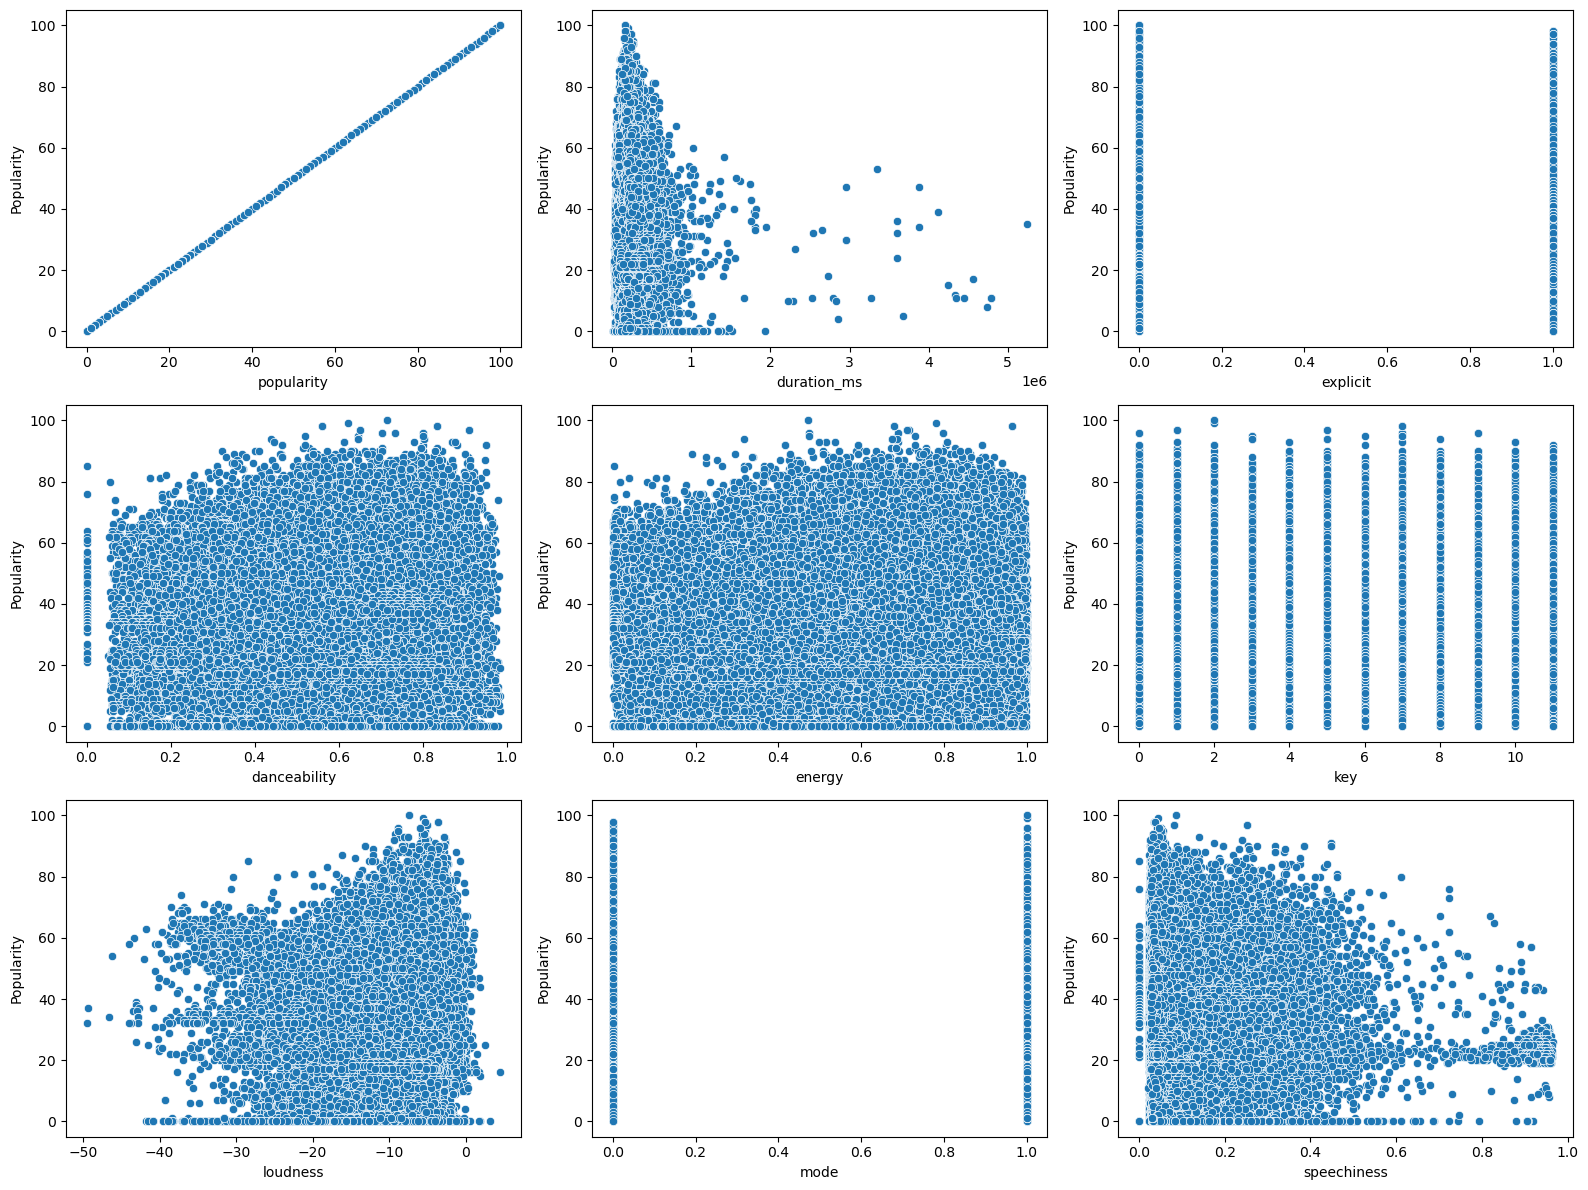

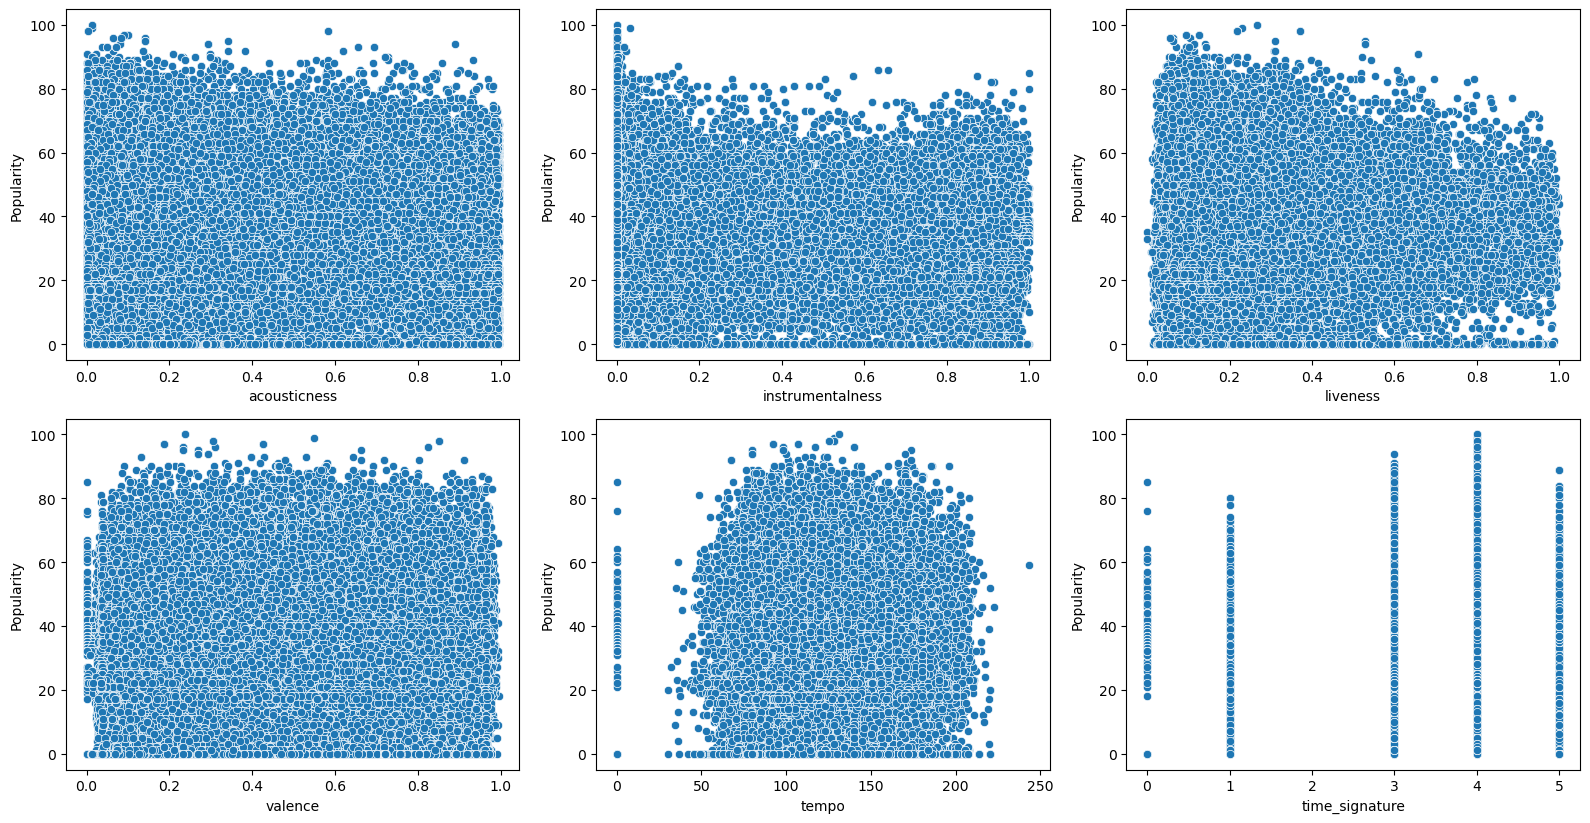

In [24]:
# Number of subplots per figure, this is to regulate that we do not pass the 9 subplot restriction per figure
num_subplots_per_figure = 9
num_figures = (len(numerical_columns) - 1) // num_subplots_per_figure + 1

for f in range(num_figures):
    # Plotting scatter plots to visualize correlations with 'popularity'
    plt.figure(figsize=(16, 12))
    for i, column in enumerate(numerical_columns[f * num_subplots_per_figure : (f + 1) * num_subplots_per_figure], 1):
        plt.subplot(3, 3, i)
        sns.scatterplot(x=data[column], y=data['popularity'])
        plt.xlabel(column)
        plt.ylabel('Popularity')
    plt.tight_layout()
    plt.show()

scatter plot analysis revealed no significant linear correlation between the target variable, 'popularity,' and any other feature in the dataset. This finding suggests that simple linear models may not be suitable for accurately predicting song popularity. Instead, more sophisticated algorithms like decision trees, random forests, and XGBoost, which can handle nonlinear relationships, should be explored. Additionally, feature engineering and domain-specific insights may play a crucial role in improving the model's performance. Careful selection of appropriate modeling techniques and feature engineering strategies is essential to build an accurate and effective popularity prediction model for the music industry.

<a id="cm"></a>
### Correlation Matrix

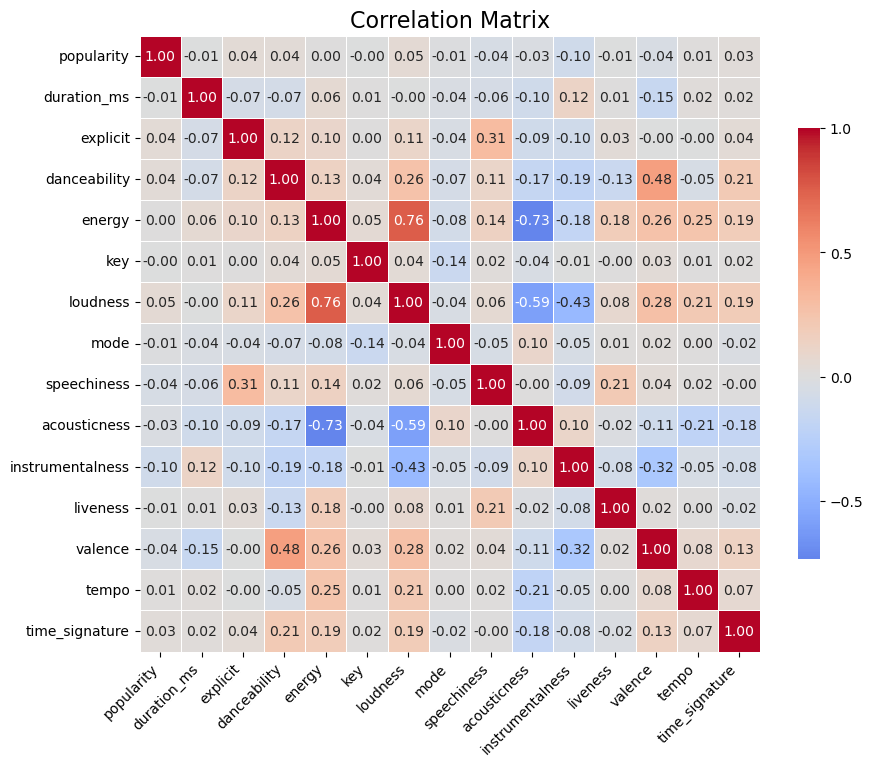

In [25]:
# Plotting correlation matrix to see overall numerical correlations
correlation_matrix = data[numerical_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0, linewidths=0.5,
            cbar_kws={"shrink": 0.7, "ticks": [-1, -0.5, 0, 0.5, 1]})

plt.title('Correlation Matrix', fontsize=16)

# Beautify x and y-axis labels
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(rotation=0, fontsize=10)

plt.show()

In [26]:
correlation_matrix

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
popularity,1.000000,-0.007129,0.044078,0.035444,0.001053,-0.003847,0.050420,-0.013948,-0.044930,-0.025458,-0.095147,-0.005397,-0.040522,0.013212,0.031076
duration_ms,-0.007129,1.000000,-0.065270,-0.073435,0.058520,0.008123,-0.003475,-0.035581,-0.062605,-0.103770,0.124364,0.010308,-0.154464,0.024356,0.018229
explicit,0.044078,-0.065270,1.000000,0.122506,0.096954,0.004485,0.108587,-0.037216,0.307951,-0.094400,-0.103405,0.032547,-0.003378,-0.002815,0.038387
danceability,0.035444,-0.073435,0.122506,1.000000,0.134325,0.036470,0.259076,-0.069224,0.108625,-0.171531,-0.185608,-0.131620,0.477347,-0.050448,0.207219
energy,0.001053,0.058520,0.096954,0.134325,1.000000,0.048007,0.761690,-0.078365,0.142508,-0.733908,-0.181880,0.184795,0.258937,0.247852,0.187127
key,-0.003847,0.008123,0.004485,0.036470,0.048007,1.000000,0.038591,-0.135911,0.020419,-0.040942,-0.006821,-0.001597,0.034099,0.010914,0.015064
loudness,0.050420,-0.003475,0.108587,0.259076,0.761690,0.038591,1.000000,-0.041768,0.060826,-0.589804,-0.433478,0.076897,0.279851,0.212447,0.191992
mode,-0.013948,-0.035581,-0.037216,-0.069224,-0.078365,-0.135911,-0.041768,1.000000,-0.046535,0.095568,-0.049961,0.014004,0.021964,0.000572,-0.024090
speechiness,-0.044930,-0.062605,0.307951,0.108625,0.142508,0.020419,0.060826,-0.046535,1.000000,-0.002184,-0.089617,0.205218,0.036637,0.017274,-0.000011
acousticness,-0.025458,-0.103770,-0.094400,-0.171531,-0.733908,-0.040942,-0.589804,0.095568,-0.002184,1.000000,0.104033,-0.020693,-0.107081,-0.208231,-0.176142


From the correlation matrix, we can infer the following:

- __"Duration_ms"__ has a weak negative correlation with "Popularity," suggesting longer songs may have slightly lower popularity.
- There is a positive correlation between __"Explicit"__ and "Popularity," indicating explicit songs are slightly more likely to be popular.
- __"Danceability"__ shows a weak positive correlation with "Popularity," suggesting more danceable tracks may be slightly more popular.
- __"Energy"__ has a very weak positive correlation with "Popularity," indicating high-energy tracks may be slightly more popular.
- __"Acousticness"__ has a weak negative correlation with "Popularity," suggesting less acoustic tracks may be slightly more popular.
- __"Instrumentalness"__ shows a negative correlation with "Popularity," implying that tracks with vocals may be more popular than purely instrumental tracks.
- __"Valence"__ has a weak negative correlation with "Popularity," indicating tracks with lower valence (more negative emotions) may be slightly more popular.

Overall, the correlations between the features and popularity are relatively weak, suggesting that the relationship between these features and popularity may not be strong or straightforward. Further exploration and consideration of other factors will be necessary to build a robust popularity prediction model.

<a id="nxt"></a>
## Next Steps

Next, we will move to a separate Jupyter notebook dedicated to modeling. We'll begin with feature engineering, carefully selecting and transforming relevant features for predicting song popularity.

After that, we'll conduct multiple baseline modeling using various algorithms with default settings to establish a performance benchmark.

Following the baselines, we'll fine-tune the models by adjusting hyperparameters to optimize accuracy and precision, prioritizing precision as a key metric.

Our aim is to create a highly accurate and precise popularity prediction model, providing valuable insights for record label companies and new artists. We'll also plan for future integration of user data and live data to further enhance the model's performance and address potential cold start issues. Ultimately, our project aims to revolutionize the way song popularity is predicted, benefiting the music industry and supporting the success of emerging artists and record labels.